# Text Mining and Search Project

# Libraries

In [1]:
import pandas as pd
import os
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pathlib import Path
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer 
import nltk
from wordcloud import WordCloud
import gensim.corpora as corpora
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle

In [2]:
os.chdir("C:/Users/andre/OneDrive/Documenti/unimib/magistrale/secondo anno/text mining search/nuovo/progetto/")

# Datasets

In [3]:
df_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
df_review = pd.read_json('yelp_academic_dataset_review.json', lines=True)
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


## Cleaning and pre-processing dataset

Removing columns not useful for our purposes

In [5]:
df_business = df_business.drop(columns=['address', 'state', 'postal_code', 'latitude', 'longitude', 'is_open', 'hours'])
df_business.head()

,business_id,name,city,stars,review_count,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,3.5,22,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"


In [12]:
df_review = df_review.rename(columns={'stars': 'review_stars'})
df_review.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [13]:
df_compl = pd.merge(df_review, df_business, on='business_id', how='inner')

In [14]:
df_compl.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,North Wales,3.0,169,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B..."
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,North Wales,3.0,169,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B..."
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,North Wales,3.0,169,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B..."
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,Turning Point of North Wales,North Wales,3.0,169,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B..."
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47,Turning Point of North Wales,North Wales,3.0,169,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B..."


In [15]:
df_compl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   review_id     object        
 1   user_id       object        
 2   business_id   object        
 3   review_stars  int64         
 4   useful        int64         
 5   funny         int64         
 6   cool          int64         
 7   text          object        
 8   date          datetime64[ns]
 9   name          object        
 10  city          object        
 11  stars         float64       
 12  review_count  int64         
 13  attributes    object        
 14  categories    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 853.3+ MB


In [26]:
df_compl_cat = df_compl.assign(categories = df_compl.categories
                         .str.split(', ')).explode('categories')
df_compl_cat.categories.value_counts().head(20)

Restaurants                  4724471
Food                         1813593
Nightlife                    1539757
Bars                         1455553
American (Traditional)       1011646
American (New)                984540
Breakfast & Brunch            867430
Sandwiches                    691864
Seafood                       620247
Event Planning & Services     609553
Shopping                      523254
Pizza                         475819
Burgers                       445895
Coffee & Tea                  442348
Italian                       439358
Mexican                       431020
Beauty & Spas                 370121
Arts & Entertainment          345059
Cocktail Bars                 339102
Salad                         333444
Name: categories, dtype: int64

In [23]:
# only consider italian food

df_ita = df_compl[df_compl.categories.str.contains('Italian',
                      case=True,na=False)]

In [24]:
df_ita.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,My friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"Great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,I went to Brio for the first time on Wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,I usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


In [25]:
df_ita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439358 entries, 3306 to 6989409
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   review_id     439358 non-null  object        
 1   user_id       439358 non-null  object        
 2   business_id   439358 non-null  object        
 3   review_stars  439358 non-null  int64         
 4   useful        439358 non-null  int64         
 5   funny         439358 non-null  int64         
 6   cool          439358 non-null  int64         
 7   text          439358 non-null  object        
 8   date          439358 non-null  datetime64[ns]
 9   name          439358 non-null  object        
 10  city          439358 non-null  object        
 11  stars         439358 non-null  float64       
 12  review_count  439358 non-null  int64         
 13  attributes    439063 non-null  object        
 14  categories    439358 non-null  object        
dtypes: datetime64

# Text Preprocessing

## 1. Case folding

Converting all text of reviews into lowercase

In [27]:
df_ita['text'] = df_ita['text'].str.lower()
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\4086609840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text'] = df_ita['text'].str.lower()


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! gre...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


## 2. Remove numbers

In [28]:
df_ita['text']= df_ita['text'].apply(lambda x: re.sub(r'\d+', '', x))
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\1995465426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text']= df_ita['text'].apply(lambda x: re.sub(r'\d+', '', x))


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! gre...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


## 3. Remove empty lines
Removing all the tabs and empty lines like: `\\n`, `\\`.

In [29]:
def remove_newlines_tabs(text):
    formatted = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return formatted

In [30]:
df_ita['text'] = df_ita['text'].apply(lambda text: remove_newlines_tabs(text))
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\1334855698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text'] = df_ita['text'].apply(lambda text: remove_newlines_tabs(text))


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! gre...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


## 4. Remove links

Removing links and URLs inside the reviews.

In [ ]:
data_links = data[data['text'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] #data containing links
print("Size of the dataset with links:", data_links.shape)
display(data_links.head(2))

In [31]:
def remove_links(text):
  https = re.sub(r'http\S+', ' ', text)
  com = re.sub(r"www\.[A-Za-z]*\.com", " ", https)
  return com

In [33]:
df_ita['text']= df_ita['text'].apply(remove_links)
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\2206339957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text']= df_ita['text'].apply(remove_links)


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! gre...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


In [35]:
def remove_com(text):
    c = re.sub(r'[A-Za-z]*\.com[^a-zA-Z]', ' ', text)
    return c

In [37]:
df_ita['text'] = df_ita['text'].apply(remove_com)
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\865179329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text'] = df_ita['text'].apply(remove_com)


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! gre...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


## 5. Remove whitespaces

In [38]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [39]:
df_ita['text'] = df_ita['text'].apply(lambda x: remove_whitespaces(x))
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\687568497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text'] = df_ita['text'].apply(lambda x: remove_whitespaces(x))


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


## 6. Remove emoji

In [40]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    try:
         emoji_pattern.sub(r' ', string)
         return emoji_pattern.sub(r' ', string)
    except:
        print(string)
        return string
    

In [41]:
df_ita['text'] = df_ita['text'].apply(lambda x: remove_emoji(x))
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\4245193512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['text'] = df_ita['text'].apply(lambda x: remove_emoji(x))


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian..."


## 7. Removing repeated characters

In [140]:
df_ita['final_text'] = np.nan
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\1072375819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text'] = np.nan


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",NaN
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",NaN
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",NaN
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",NaN
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",NaN


In [139]:
def removing_character_repetition(text):
    pattern = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL) #matching for all case alphabets
    formatted = pattern.sub(r"\1\1", text) #limits to two characters
    return formatted

In [151]:
df_ita['final_text'] = df_ita['text'].apply(removing_character_repetition)
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\255191568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text'] = df_ita['text'].apply(removing_character_repetition)


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",love going here for happy hour or dinner! grea...
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",my friends at work (connoisseurs of good food ...
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","great service, relaxing atmosphere and the foo..."
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",i went to brio for the first time on wednesday...
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",i usually steer clear of the chain restaurants...


## 8. Removing punctuation

In [144]:
punct = list(string.punctuation)
punct.append(['€','¯'])

In [145]:
def remove_punctuation(text):
    punctuationfree="".join([w for w in text if w not in punct])
    return punctuationfree

In [152]:
df_ita['final_text']= df_ita['final_text'].apply(remove_punctuation)
df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\108222385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text']= df_ita['final_text'].apply(remove_punctuation)


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",love going here for happy hour or dinner great...
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",my friends at work connoisseurs of good food i...
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",great service relaxing atmosphere and the food...
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",i went to brio for the first time on wednesday...
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...",i usually steer clear of the chain restaurants...


## 9. Tokenization and stopwords removing

In [43]:
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
print(tokenization(df_ita.iloc[0]['final_text']))

['', 'love', 'going', 'happy', 'hour', 'dinner', 'great', 'patio', 'fans', 'beat', 'stl', 'heat', 'alsovery', 'accomodating', 'location', 'like', 'veal', 'milanese', 'mixed', 'greens', 'instead', 'pasta', 'theyll', 'modify', 'menu', 'suit', 'taste', '']


<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
C:\Users\andre\AppData\Local\Temp\ipykernel_36368\3852441051.py:2: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+',text)


In [159]:
for ind in df_ita.index:
    df_ita['final_text'][ind] = tokenization(df_ita['final_text'][ind])

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\4116534682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text'][ind] = tokenization(df_ita['final_text'][ind])


In [160]:
df_ita.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text,final_text_2
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[love, going, here, for, happy, hour, or, dinn...",love going here for happy hour or dinner great...
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[my, friends, at, work, connoisseurs, of, good...",my friends at work connoisseurs of good food i...
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[great, service, relaxing, atmosphere, and, th...",great service relaxing atmosphere and the food...
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[i, went, to, brio, for, the, first, time, on,...",i went to brio for the first time on wednesday...
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[i, usually, steer, clear, of, the, chain, res...",i usually steer clear of the chain restaurants...


In [161]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    tokenized_text_without_stopwords = []
    for token in text:
        if token.lower() not in stop_words:
            tokenized_text_without_stopwords.append(token)
    return tokenized_text_without_stopwords

for ind in df_ita.index:
    df_ita['final_text'][ind] = remove_stopwords(df_ita['final_text'][ind])

df_ita.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\3552369928.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text'][ind] = remove_stopwords(df_ita['final_text'][ind])


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text,final_text_2
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[love, going, happy, hour, dinner, great, pati...",love going here for happy hour or dinner great...
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[friends, work, connoisseurs, good, food, st, ...",my friends at work connoisseurs of good food i...
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[great, service, relaxing, atmosphere, food, e...",great service relaxing atmosphere and the food...
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[went, brio, first, time, wednesday, dinner, f...",i went to brio for the first time on wednesday...
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[usually, steer, clear, chain, restaurants, si...",i usually steer clear of the chain restaurants...


## 10. Lemmatization

In [162]:
wordnet_lemmatizer = WordNetLemmatizer()

In [165]:
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df_ita['final_text_2']= df_ita['final_text'].apply(lambda x: lemmatizer(x))

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\857461435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text_2']= df_ita['final_text'].apply(lambda x: lemmatizer(x))


## Saving dataset

In [182]:
df_ita['final_text_string'] = np.nan

In [183]:
for ind in df_ita.index:
    df_ita['final_text_string'][ind] = ' '.join(list(df_ita['final_text'][ind]))

C:\Users\andre\AppData\Local\Temp\ipykernel_40372\2115145861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['final_text_string'][ind] = ' '.join(list(df_ita['final_text'][ind]))


In [184]:
df_ita.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text,final_text_string
3306,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[love, going, happy, hour, dinner, great, pati...",love going happy hour dinner great patio fans ...
3307,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[friends, work, connoisseurs, good, food, st, ...",friends work connoisseurs good food st louis a...
3308,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[great, service, relaxing, atmosphere, food, e...",great service relaxing atmosphere food excepti...
3309,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[went, brio, first, time, wednesday, dinner, f...",went brio first time wednesday dinner friend s...
3310,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","[usually, steer, clear, chain, restaurants, si...",usually steer clear chain restaurants since ma...


In [223]:
# saving dataframe in csv format
df_ita.to_csv('df_ita.csv')

In [225]:
# saving dataframe in csv format
df_ita.to_csv('df_ita.txt')

# Data visualizations and few statistics

In [42]:
df_business_ita = df_business[df_business.categories.str.contains('Italian',
                      case=True,na=False)]
df_business_ita.head()

,business_id,name,city,stars,review_count,attributes,categories
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,3.0,19,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,Largo,4.5,100,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants"
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,Reno,2.5,339,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian"
28,QdN72BWoyFypdGJhhI5r7g,Bar One,Philadelphia,4.0,65,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta..."
41,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,Alton,3.0,94,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Specialty Food, Steakhouses, Food..."


In [43]:
df_business_ita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573 entries, 8 to 150313
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   4573 non-null   object 
 1   name          4573 non-null   object 
 2   city          4573 non-null   object 
 3   stars         4573 non-null   float64
 4   review_count  4573 non-null   int64  
 5   attributes    4538 non-null   object 
 6   categories    4573 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 285.8+ KB


We consider the 4573 Italian activities 

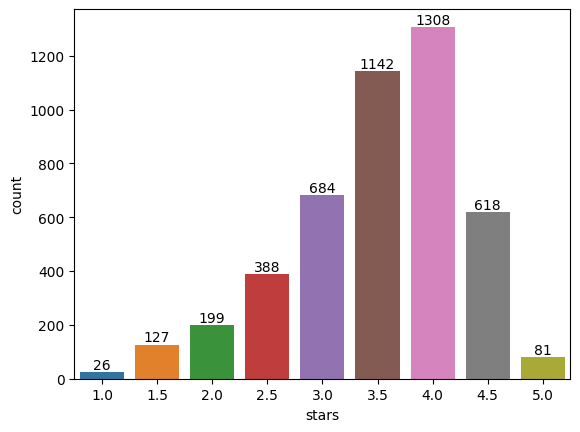

In [59]:
ax = sns.countplot(data=df_business_ita, x="stars")
for container in ax.containers:
    ax.bar_label(container)

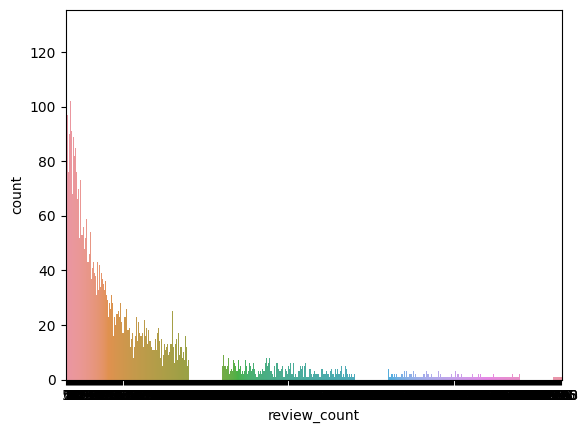

In [63]:
ax = sns.countplot(data=df_business_ita, x="review_count")
#for container in ax.containers:
#    ax.bar_label(container)

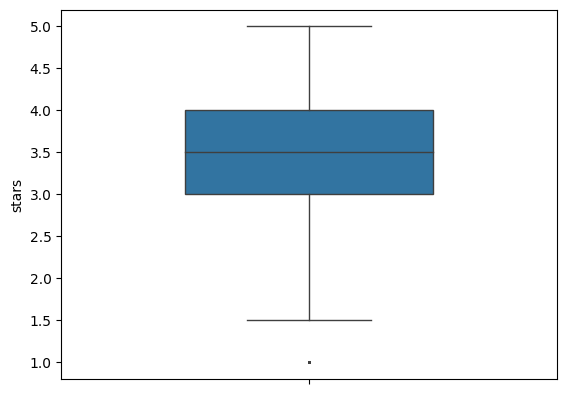

In [66]:
sns.boxplot(y='stars', data=df_business_ita, linewidth=1, width=0.5, fliersize=1)
plt.show()

In [172]:
print(df_business_ita['stars'].value_counts())
print(df_business_ita['stars'].value_counts()/df_business_ita.shape[0])

4.0    1308
3.5    1142
3.0     684
4.5     618
2.5     388
2.0     199
1.5     127
5.0      81
1.0      26
Name: stars, dtype: int64
4.0    0.286027
3.5    0.249727
3.0    0.149574
4.5    0.135141
2.5    0.084846
2.0    0.043516
1.5    0.027772
5.0    0.017713
1.0    0.005686
Name: stars, dtype: float64


In [174]:
df_business_ita['stars'].describe() 

count    4573.000000
mean        3.510059
std         0.783139
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

In [175]:
df_business_ita['review_count'].describe() 

count    4573.000000
mean       92.396676
std       156.779313
min         5.000000
25%        18.000000
50%        44.000000
75%       108.000000
max      4250.000000
Name: review_count, dtype: float64

# Topic Modelling

In [3]:
df_ita = pd.read_csv('df_ita.csv', sep=',', low_memory=False)
df_ita = df_ita.drop('Unnamed: 0', axis = 1)
df_ita.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text,final_text_string
0,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,love going here for happy hour or dinner! grea...,2014-06-27 22:44:01,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","['love', 'going', 'happy', 'hour', 'dinner', '...",love going happy hour dinner great patio fans ...
1,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,my friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","['friends', 'work', 'connoisseurs', 'good', 'f...",friends work connoisseurs good food st louis a...
2,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","['great', 'service', 'relaxing', 'atmosphere',...",great service relaxing atmosphere food excepti...
3,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,i went to brio for the first time on wednesday...,2015-10-17 04:56:25,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","['went', 'brio', 'first', 'time', 'wednesday',...",went brio first time wednesday dinner friend s...
4,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,i usually steer clear of the chain restaurants...,2016-01-04 16:56:32,Brio Italian Grille,St Louis,3.5,366,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","['usually', 'steer', 'clear', 'chain', 'restau...",usually steer clear chain restaurants since ma...


In [134]:
# only consider italian food in the city of St Louis

df_ita_in = df_ita[df_ita.city.str.contains('Indianapolis',
                      case=True,na=False)]

In [136]:
df_ita_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14347 entries, 4476 to 438027
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          14347 non-null  object 
 1   user_id            14347 non-null  object 
 2   business_id        14347 non-null  object 
 3   review_stars       14347 non-null  int64  
 4   useful             14347 non-null  int64  
 5   funny              14347 non-null  int64  
 6   cool               14347 non-null  int64  
 7   text               14347 non-null  object 
 8   date               14347 non-null  object 
 9   name               14347 non-null  object 
 10  city               14347 non-null  object 
 11  stars              14347 non-null  float64
 12  review_count       14347 non-null  int64  
 13  attributes         14337 non-null  object 
 14  categories         14347 non-null  object 
 15  final_text         14347 non-null  object 
 16  final_text_string  1434

### WordCloud

In [137]:
total_review_text = " ".join(review for review in df_ita_in.final_text_string)

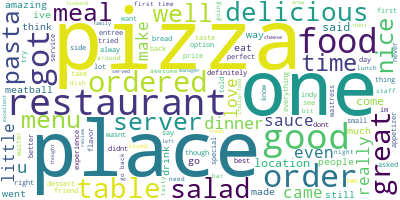

In [139]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(total_review_text)

# Visualize the word cloud
wordcloud.to_image()

### Topic Modelling

In [140]:
total_review_text_list = [total_review_text.split()]

In [143]:
# Create Dictionary
id2word = corpora.Dictionary(total_review_text_list)

In [144]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in total_review_text_list]

In [145]:
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 2), (3, 3), (4, 1), (5, 6), (6, 2), (7, 8), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 19), (19, 497), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 2), (29, 1)]


In [146]:
corpus

[[(0, 2),
  (1, 1),
  (2, 2),
  (3, 3),
  (4, 1),
  (5, 6),
  (6, 2),
  (7, 8),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 19),
  (19, 497),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 5),
  (32, 2),
  (33, 5),
  (34, 3),
  (35, 9),
  (36, 1),
  (37, 12),
  (38, 1),
  (39, 1),
  (40, 105),
  (41, 737),
  (42, 2),
  (43, 3),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 9),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 8),
  (53, 1),
  (54, 13),
  (55, 15),
  (56, 3),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 7),
  (61, 1),
  (62, 25),
  (63, 2),
  (64, 13),
  (65, 3),
  (66, 5),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 31),
  (71, 37),
  (72, 17),
  (73, 9),
  (74, 3),
  (75, 30),
  (76, 2),
  (77, 8),
  (78, 44),
  (79, 2),
  (80, 21),
  (81, 32),
  (82, 3),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 77),


In [147]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
for t in lda_model.print_topics():
    print(t)
doc_lda = lda_model[corpus]

(0, '0.013*"pizza" + 0.010*"good" + 0.009*"great" + 0.009*"food" + 0.008*"place" + 0.007*"service" + 0.006*"get" + 0.006*"back" + 0.005*"time" + 0.005*"order"')
(1, '0.012*"food" + 0.011*"pizza" + 0.011*"good" + 0.009*"place" + 0.009*"great" + 0.007*"like" + 0.006*"service" + 0.006*"get" + 0.006*"time" + 0.005*"back"')
(2, '0.013*"pizza" + 0.012*"food" + 0.010*"good" + 0.008*"great" + 0.007*"place" + 0.006*"service" + 0.006*"time" + 0.006*"one" + 0.005*"get" + 0.005*"like"')
(3, '0.012*"pizza" + 0.011*"food" + 0.011*"good" + 0.010*"great" + 0.008*"service" + 0.008*"place" + 0.007*"would" + 0.007*"like" + 0.006*"time" + 0.006*"get"')
(4, '0.015*"food" + 0.010*"pizza" + 0.009*"place" + 0.008*"good" + 0.007*"great" + 0.007*"service" + 0.006*"one" + 0.006*"like" + 0.005*"back" + 0.005*"us"')
(5, '0.014*"food" + 0.012*"good" + 0.010*"pizza" + 0.009*"place" + 0.009*"great" + 0.008*"service" + 0.006*"time" + 0.006*"ordered" + 0.005*"go" + 0.005*"get"')
(6, '0.014*"pizza" + 0.013*"good" + 0.01

In [148]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/andre/OneDrive/Documenti/unimib/magistrale/secondo anno/text mining search/nuovo/progetto/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

In [149]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.002624  0.001480       1        1  41.391839
6      0.002299  0.001447       2        1  11.853831
1     -0.000734  0.000810       3        1  10.501518
8     -0.001076 -0.000953       4        1   9.476339
9     -0.000955  0.000036       5        1   8.311504
3      0.000124  0.000987       6        1   6.606435
4     -0.000374 -0.002226       7        1   5.198133
7      0.000667 -0.001857       8        1   3.455988
0      0.001420  0.000588       9        1   1.977454
2      0.001253 -0.000312      10        1   1.226959, topic_info=          Term         Freq        Total Category  logprob  loglift
16959    pizza  8857.000000  8857.000000  Default  30.0000  30.0000
8728      food  9877.000000  9877.000000  Default  29.0000  29.0000
9701      good  8765.000000  8765.000000  Default  28.0000  28.0000
9905     great  7142.000000  7142.000000  Default  27.0000  27.0000
17047    place  6510.000000  6510.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
19742    sauce    41.320410  3604.909643  Topic10  -5.4710  -0.0681
2581     bread    34.513034  2746.340178  Topic10  -5.6511   0.0239
15742  ordered    39.999095  4143.767718  Topic10  -5.5035  -0.2399
24367       us    35.411838  3561.038417  Topic10  -5.6253  -0.2101
11767  italian    33.919879  3760.980456  Topic10  -5.6684  -0.3078

[933 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
41         1  0.324667  absolutely
41         2  0.160788  absolutely
41         3  0.112861  absolutely
41         4  0.091216  absolutely
41         5  0.091216  absolutely
...      ...       ...         ...
25880      6  0.075482    zucchini
25880      7  0.050322    zucchini
25880      8  0.025161    zucchini
25880      9  0.025161    zucchini
25880     10  0.025161    zucchini

[4355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 2, 9, 10, 4, 5, 8, 1, 3])

In [162]:
topic_results = lda_model[corpus]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in topic_results]

topics = [[(term, round(wt, 3)) for term, wt in lda_model.show_topic(n, topn=10)] for n in range(0, lda_model.num_topics)]

In [163]:
df_topics = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, lda_model.num_topics+1)] )
df_topics

,Terms per Topic
Topic1,"pizza, good, great, food, place, service, get,..."
Topic2,"food, pizza, good, place, great, like, service..."
Topic3,"pizza, food, good, great, place, service, time..."
Topic4,"pizza, food, good, great, service, place, woul..."
Topic5,"food, pizza, place, good, great, service, one,..."
Topic6,"food, good, pizza, place, great, service, time..."
Topic7,"pizza, good, food, great, service, like, back,..."
Topic8,"food, pizza, good, great, one, place, time, li..."
Topic9,"food, pizza, great, place, good, like, time, r..."
Topic10,"pizza, food, good, service, great, place, one,..."


In [168]:
# saving topic dataframe in csv format
df_topics.to_csv('df_topics.csv')

C:\Users\andre\AppData\Local\Temp\ipykernel_45348\3963653183.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wc.generate(text=df_topics["Terms per Topic"][i])


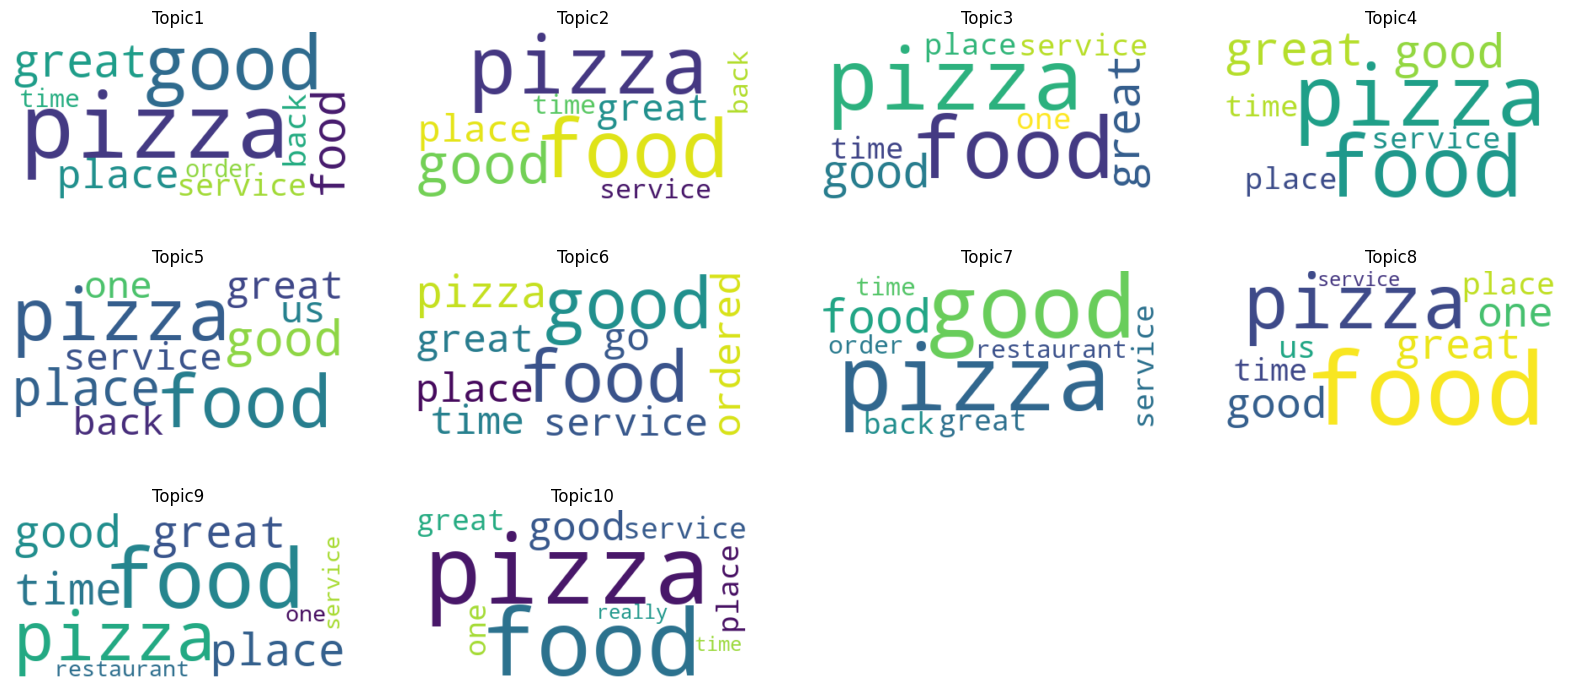

In [167]:
wc = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

for i in range(10):
    wc.generate(text=df_topics["Terms per Topic"][i])
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(df_topics.index[i])

plt.show()

# Text Classification

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [67]:
# only consider italian food in the city of Indianapolis

df_ita_in = df_ita[df_ita.city.str.contains('Indianapolis',
                      case=True,na=False)]

In [132]:
df_ita_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14347 entries, 4476 to 438027
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          14347 non-null  object 
 1   user_id            14347 non-null  object 
 2   business_id        14347 non-null  object 
 3   review_stars       14347 non-null  int64  
 4   useful             14347 non-null  int64  
 5   funny              14347 non-null  int64  
 6   cool               14347 non-null  int64  
 7   text               14347 non-null  object 
 8   date               14347 non-null  object 
 9   name               14347 non-null  object 
 10  city               14347 non-null  object 
 11  stars              14347 non-null  float64
 12  review_count       14347 non-null  int64  
 13  attributes         14337 non-null  object 
 14  categories         14347 non-null  object 
 15  final_text         14347 non-null  object 
 16  final_text_string  1434

In [71]:
df_ita_in['good_bad'] = np.NaN

C:\Users\andre\AppData\Local\Temp\ipykernel_45348\963584112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita_in['good_bad'] = np.NaN


In [106]:
df_ita_in['good_bad'] = np.where(df_ita_in['review_stars'] > 3, 1, 0)
df_ita_in.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_45348\983794440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita_in['good_bad'] = np.where(df_ita_in['review_stars'] > 3, 1, 0)


,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,city,stars,review_count,attributes,categories,final_text,final_text_string,good_bad
4476,HHmH0sczDaXK5-iKA3Q9dw,BiD10AVyLSU4ZugC-0zi8Q,0cB1kDuZCvSwpJrNdtQP8Q,1,1,0,0,last time: this is the second and last time my...,2018-03-23 19:31:46,Giordano's,Indianapolis,3.5,284,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Pizza, Italian, Salad","['last', 'time', 'second', 'last', 'time', 'wi...",last time second last time wife visit place ta...,0
4477,yzAC50YF40m_Z3xLTCZtNw,VpgjnPilHPznZEiNGGEbgA,0cB1kDuZCvSwpJrNdtQP8Q,5,0,0,0,best pizza i've ever had with even better serv...,2016-11-10 01:27:39,Giordano's,Indianapolis,3.5,284,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Pizza, Italian, Salad","['best', 'pizza', 'ive', 'ever', 'even', 'bett...",best pizza ive ever even better service must p...,1
4478,a8zkMZHynUKYToObkPOGfQ,ffxpqRuPexMqCmB1RINLJw,0cB1kDuZCvSwpJrNdtQP8Q,4,0,0,0,the food was pretty good and the staff was fri...,2018-04-28 16:13:27,Giordano's,Indianapolis,3.5,284,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Pizza, Italian, Salad","['food', 'pretty', 'good', 'staff', 'friendly'...",food pretty good staff friendly good family fr...,1
4479,-kbo2BPl2wjgsrrw05KqqA,jXG2KKBVpJdPq5b-WXFQHw,0cB1kDuZCvSwpJrNdtQP8Q,4,0,0,0,i'm % biased to any giordano's location that p...,2018-09-03 16:33:21,Giordano's,Indianapolis,3.5,284,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Pizza, Italian, Salad","['im', 'biased', 'giordanos', 'location', 'pro...",im biased giordanos location provides flavor e...,1
4480,Ad3Uc1ft2NkKqfhEJq1Npg,v3L3f7EbAqM2kxolWa7hrg,0cB1kDuZCvSwpJrNdtQP8Q,5,1,0,0,"so we walked in and a min wait, yeah that's no...",2016-08-04 16:31:51,Giordano's,Indianapolis,3.5,284,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Pizza, Italian, Salad","['walked', 'min', 'wait', 'yeah', 'thats', 'ha...",walked min wait yeah thats happening open seat...,1


### Classification with Count Vectorizer

In [107]:
X, y = df_ita_in['final_text_string'], df_ita_in['good_bad']
X_train, X_test, y_train, y_test = train_test_split(df_ita_in['final_text_string'],
                                                    df_ita_in['good_bad'],
                                                    random_state=0, test_size = 0.1)

In [108]:
vectorizer = CountVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [109]:
X_train.shape

(12912,)

In [110]:
X_train_transformed.shape

(12912, 24502)

In [113]:
clf = DecisionTreeClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [114]:
print("DT")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

Accuracy: 0.7721254355400697
F1 score: 0.8299531981279251
Recall score: 0.8278008298755186


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will

In [120]:
clf = SVC().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [121]:
print("SVM")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

SVM
Accuracy: 0.883623693379791
F1 score: 0.9150991357397051
Recall score: 0.9336099585062241


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will

In [117]:
clf = RandomForestClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [119]:
print("RF")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

RF
Accuracy: 0.8613240418118467
F1 score: 0.90316301703163
Recall score: 0.9626556016597511


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will

### With TFIDF

In [122]:
X, y = df_ita_in['final_text_string'], df_ita_in['good_bad']
X_train, X_test, y_train, y_test = train_test_split(df_ita_in['final_text_string'],
                                                    df_ita_in['good_bad'],
                                                    random_state=0, test_size = 0.1)

In [123]:
vectorizer = TfidfVectorizer(min_df=2)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [124]:
X_train.shape

(12912,)

In [125]:
X_train_transformed.shape

(12912, 12171)

In [126]:
clf = DecisionTreeClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [127]:
print("DT")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

DT
Accuracy: 0.7770034843205574
F1 score: 0.8357289527720739
Recall score: 0.8443983402489627


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will

In [128]:
clf = SVC().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [129]:
print("SVM")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

SVM
Accuracy: 0.8954703832752613
F1 score: 0.9241658240647118
Recall score: 0.9481327800829875


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will

In [130]:
clf = RandomForestClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [131]:
print("RF")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

RF
Accuracy: 0.8717770034843205
F1 score: 0.9096267190569746
Recall score: 0.9605809128630706


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will